In [1]:
import joblib
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import lightgbm
import xgboost 

from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             plot_confusion_matrix, 
                             roc_auc_score,
                             f1_score,
                             matthews_corrcoef,
                             cohen_kappa_score)

from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

RANDOM_STATE = 42

Mounted at /content/drive


In [2]:
def evaluate_classifier(clf, X, y):
    """Classification Metrics"""
    y_pred = clf.predict(X)
    probabilities = clf.predict_proba(X)

    roc_auc = roc_auc_score(y, probabilities, average='weighted', multi_class='ovr')
    f1score = f1_score(y, y_pred, average='weighted')

    print(f'ROC-AUC (One vs Rest) = {roc_auc}')
    print(f'Weighted F1-score = {f1score}')
    print(classification_report(y, y_pred))

In [3]:
df = pd.read_csv('drive/MyDrive/UNSW Data Science/Term 3 2022/DATA3001/hourly_transformed_medium.csv')

In [4]:
X = df.drop(columns=['info', 'target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RANDOM_STATE)

## Logistic Regression

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

In [ ]:
scaler = StandardScaler()
logreg = LogisticRegression(random_state=RANDOM_STATE, max_iter=5000)

pipe = Pipeline(steps=[('scaler', scaler), ('logreg', logreg)])

params_lr = {
    'logreg__multi_class': ['auto', 'ovr', 'multinomial'],
    'logreg__C': np.linspace(0.01, 100, 10)
}

search_lr = GridSearchCV(estimator=pipe, 
                         param_grid=params_lr, 
                         cv=5, 
                         scoring='f1_weighted')

search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...........logreg__C=0.01, logreg__multi_class=auto; total time=   0.5s
[CV] END ...........logreg__C=0.01, logreg__multi_class=auto; total time=   0.7s
[CV] END ...........logreg__C=0.01, logreg__multi_class=auto; total time=   0.9s
[CV] END ...........logreg__C=0.01, logreg__multi_class=auto; total time=   0.5s
[CV] END ...........logreg__C=0.01, logreg__multi_class=auto; total time=   0.4s
[CV] END ............logreg__C=0.01, logreg__multi_class=ovr; total time=   0.4s
[CV] END ............logreg__C=0.01, logreg__multi_class=ovr; total time=   0.4s
[CV] END ............logreg__C=0.01, logreg__multi_class=ovr; total time=   0.4s
[CV] END ............logreg__C=0.01, logreg__multi_class=ovr; total time=   0.4s
[CV] END ............logreg__C=0.01, logreg__multi_class=ovr; total time=   0.4s
[CV] END ....logreg__C=0.01, logreg__multi_class=multinomial; total time=   0.4s
[CV] END ....logreg__C=0.01, logreg__multi_clas

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=42))]),
             param_grid={'logreg__C': array([1.000e-02, 1.112e+01, 2.223e+01, 3.334e+01, 4.445e+01, 5.556e+01,
       6.667e+01, 7.778e+01, 8.889e+01, 1.000e+02]),
                         'logreg__multi_class': ['auto', 'ovr', 'multinomial']},
             scoring='f1_weighted', verbose=2)

### Grid Search Results

In [ ]:
print(search_lr.best_params_)
pd.DataFrame(search_lr.cv_results_).sort_values(by='rank_test_score')

{'logreg__C': 100.0, 'logreg__multi_class': 'auto'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__multi_class,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,11.708162,0.634511,0.020327,0.005479,100.0,multinomial,"{'logreg__C': 100.0, 'logreg__multi_class': 'm...",0.337455,0.330819,0.379207,0.259625,0.322690,0.325959,0.038476,1
27,11.249175,0.898457,0.017922,0.000504,100.0,auto,"{'logreg__C': 100.0, 'logreg__multi_class': 'a...",0.337455,0.330819,0.379207,0.259625,0.322690,0.325959,0.038476,1
26,10.999221,1.215631,0.018252,0.001238,88.89,multinomial,"{'logreg__C': 88.89, 'logreg__multi_class': 'm...",0.335764,0.323987,0.377943,0.251529,0.321798,0.322204,0.040716,3
24,11.437591,0.766799,0.018117,0.000731,88.89,auto,"{'logreg__C': 88.89, 'logreg__multi_class': 'a...",0.335764,0.323987,0.377943,0.251529,0.321798,0.322204,0.040716,3
23,10.221274,0.661014,0.018906,0.002973,77.78,multinomial,"{'logreg__C': 77.78, 'logreg__multi_class': 'm...",0.335988,0.320405,0.373635,0.241273,0.315275,0.317315,0.043167,5
21,10.320927,0.657657,0.018608,0.002313,77.78,auto,"{'logreg__C': 77.78, 'logreg__multi_class': 'a...",0.335988,0.320405,0.373635,0.241273,0.315275,0.317315,0.043167,5
20,10.088562,0.738495,0.017816,0.000802,66.67,multinomial,"{'logreg__C': 66.67, 'logreg__multi_class': 'm...",0.322348,0.313027,0.365978,0.234106,0.309692,0.309030,0.042545,7
18,10.599893,1.303664,0.018763,0.002633,66.67,auto,"{'logreg__C': 66.67, 'logreg__multi_class': 'a...",0.322348,0.313027,0.365978,0.234106,0.309692,0.309030,0.042545,7
17,8.517323,0.590379,0.018489,0.001584,55.56,multinomial,"{'logreg__C': 55.559999999999995, 'logreg__mul...",0.325030,0.293041,0.345666,0.235620,0.304856,0.300842,0.037216,9
15,9.039631,1.298462,0.017755,0.000409,55.56,auto,"{'logreg__C': 55.559999999999995, 'logreg__mul...",0.325030,0.293041,0.345666,0.235620,0.304856,0.300842,0.037216,9


## Evaluating Logistic Regression

https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

"First, a multiclass problem is broken down into a series of binary problems using either One-vs-One (OVO) or One-vs-Rest (OVR, also called One-vs-All) approaches. OVO presents computational drawbacks, so professionals prefer the OVR approach. As I discussed the differences between these two approaches at length in my last article, we will only focus on OVR today."

In [ ]:
evaluate_classifier(search_lr.best_estimator_, X_test, y_test)

ROC-AUC (One vs Rest) = 0.8813594214071029
Weighted F1-score = 0.33444925774805145
                                                                   precision    recall  f1-score   support

  FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount       0.57      0.13      0.21        31
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount       0.00      0.00      0.00        31
   FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount       0.78      0.53      0.63       158
 FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount       0.29      0.03      0.05       158
   FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount       0.94      0.70      0.80       233
 FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount       0.31      0.53      0.39       233
   ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount       0.05      0.03      0.04       207
 ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacket

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
search_lr.best_params_

{'logreg__C': 100.0, 'logreg__multi_class': 'auto'}

In [ ]:
# Save model
with open('drive/MyDrive/UNSW Data Science/Term 3 2022/DATA3001/logistic_regression_pipeline.joblib', 'wb') as f:
    joblib.dump(search_lr.best_estimator_, f)

In [ ]:
search_lr.best_estimator_.score(X_test, y_test)

0.39092495636998253

## K Nearest Neighbours

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

pipeline_knn = Pipeline(steps=[('scaling_knn', scaler), ('modeling_knn', knn)])
max_k = int(np.ceil(np.sqrt(len(y_train))))

params_knn = {'modeling_knn__n_neighbors': np.arange(3, max_k, 2), 
              'modeling_knn__p': [1, 2]}  # p=1->manhattan, p=2->euclidean

knn_search = GridSearchCV(pipeline_knn, 
                          param_grid=params_knn, 
                          cv=5, 
                          verbose=2, 
                          scoring='f1_weighted')

knn_search.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=1; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=1; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=1; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=1; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=1; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=2; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=2; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=2; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=2; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=3, modeling_knn__p=2; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=5, modeling_knn__p=1; total time=   0.1s
[CV] END .....modeling_knn__n_neighbors=5, mode

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling_knn', StandardScaler()),
                                       ('modeling_knn',
                                        KNeighborsClassifier())]),
             param_grid={'modeling_knn__n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75, 77, 79, 81]),
                         'modeling_knn__p': [1, 2]},
             scoring='f1_weighted', verbose=2)

In [ ]:
len(y_train)

6874

In [ ]:
print(knn_search.best_params_)
pd.DataFrame(knn_search.cv_results_)

{'modeling_knn__n_neighbors': 3, 'modeling_knn__p': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling_knn__n_neighbors,param_modeling_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014844,0.000617,0.053880,0.005576,3,1,"{'modeling_knn__n_neighbors': 3, 'modeling_knn...",0.896524,0.904648,0.896111,0.910164,0.890872,0.899664,0.006854,1
1,0.016980,0.003880,0.056951,0.005479,3,2,"{'modeling_knn__n_neighbors': 3, 'modeling_knn...",0.888330,0.893400,0.888571,0.902098,0.880940,0.890668,0.006966,2
2,0.015699,0.003095,0.054835,0.003555,5,1,"{'modeling_knn__n_neighbors': 5, 'modeling_knn...",0.881155,0.890338,0.884441,0.887170,0.862152,0.881051,0.009923,3
3,0.015329,0.001592,0.063532,0.020506,5,2,"{'modeling_knn__n_neighbors': 5, 'modeling_knn...",0.866739,0.873744,0.868821,0.872593,0.849539,0.866287,0.008747,4
4,0.016872,0.004249,0.055253,0.003124,7,1,"{'modeling_knn__n_neighbors': 7, 'modeling_knn...",0.860579,0.871550,0.861311,0.856764,0.853668,0.860774,0.006050,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.014477,0.000479,0.074224,0.002185,77,2,"{'modeling_knn__n_neighbors': 77, 'modeling_kn...",0.597665,0.616494,0.621315,0.596066,0.612871,0.608882,0.010183,78
76,0.015193,0.002072,0.078043,0.002994,79,1,"{'modeling_knn__n_neighbors': 79, 'modeling_kn...",0.647106,0.645878,0.657380,0.618338,0.642295,0.642199,0.012942,69
77,0.015802,0.001785,0.074911,0.001809,79,2,"{'modeling_knn__n_neighbors': 79, 'modeling_kn...",0.606869,0.613626,0.627808,0.591428,0.608596,0.609665,0.011717,77
78,0.014642,0.000349,0.078490,0.003208,81,1,"{'modeling_knn__n_neighbors': 81, 'modeling_kn...",0.658747,0.646115,0.651499,0.614659,0.639243,0.642052,0.015118,70


In [ ]:
knn_search.best_params_

{'modeling_knn__n_neighbors': 3, 'modeling_knn__p': 1}

In [ ]:
evaluate_classifier(knn_search.best_estimator_, X_test, y_test)

ROC-AUC (One vs Rest) = 0.9775663183537353
Weighted F1-score = 0.9080967594142537
                                                                   precision    recall  f1-score   support

  FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount       0.76      0.84      0.80        31
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount       0.55      0.55      0.55        31
   FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount       0.81      0.92      0.86       158
 FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount       0.75      0.76      0.76       158
   FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount       0.97      0.96      0.96       233
 FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount       0.97      0.96      0.96       233
   ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount       0.93      0.97      0.95       207
 ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketC

In [ ]:
with open('drive/MyDrive/UNSW Data Science/Term 3 2022/DATA3001/knn_pipeline.joblib', 'wb') as f:
    joblib.dump(knn_search.best_estimator_, f)

## Random Forest

In [ ]:
params_rf = {
    'n_estimators':np.arange(100, 501, 50),
    'max_depth': np.arange(3, 17, 1),
    'min_samples_leaf': np.arange(3, 31, 2),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=RANDOM_STATE)

search_rf = RandomizedSearchCV(estimator=rf, 
                               random_state=RANDOM_STATE,
                               param_distributions=params_rf, 
                               n_iter=10,
                               cv=5,
                               scoring='f1_weighted')

search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=7, n_estimators=400; total time=   2.8s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=7, n_estimators=400; total time=   2.7s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=7, n_estimators=400; total time=   2.7s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=7, n_estimators=400; total time=   2.7s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=7, n_estimators=400; total time=   2.7s
[CV] END max_depth=16, max_features=log2, min_samples_leaf=25, n_estimators=400; total time=   2.5s
[CV] END max_depth=16, max_features=log2, min_samples_leaf=25, n_estimators=400; total time=   2.5s
[CV] END max_depth=16, max_features=log2, min_samples_leaf=25, n_estimators=400; total time=   2.5s
[CV] END max_depth=16, max_features=log2, min_samples_leaf=25, n_estimators=400; total time=   2.4s
[CV] END max_depth=16, max_features=log2, mi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, scoring='f1_weighted', verbose=2)

https://www.baeldung.com/cs/multi-class-f1-score

In [ ]:
evaluate_classifier(search_rf.best_estimator_, X_test, y_test)

ROC-AUC (One vs Rest) = 0.9972022952479276
Weighted F1-score = 0.9195333004206631
                                                                   precision    recall  f1-score   support

  FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount       0.92      0.74      0.82        31
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount       0.46      0.35      0.40        31
   FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount       0.84      0.89      0.87       158
 FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount       0.81      0.82      0.81       158
   FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount       1.00      1.00      1.00       233
 FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount       1.00      1.00      1.00       233
   ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount       0.91      0.98      0.94       207
 ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketC

## Feature Importances

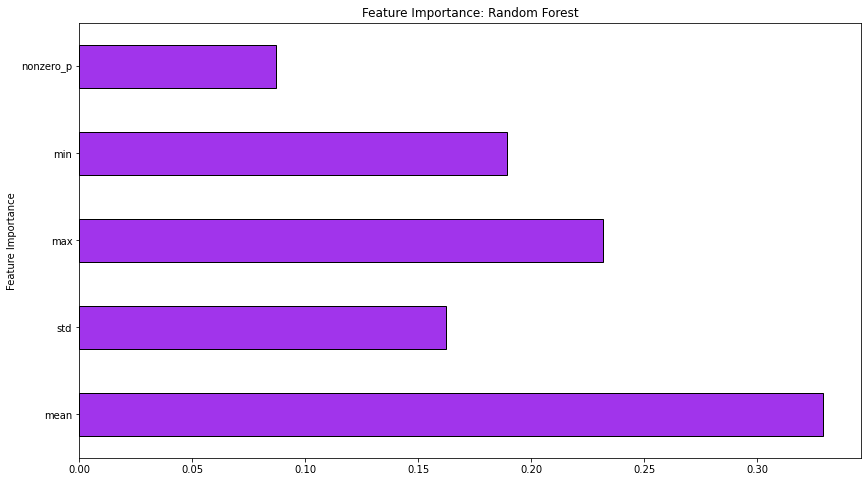

In [ ]:
forest_importances = pd.Series(search_rf.best_estimator_.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots(figsize=(14, 8))

forest_importances.plot(kind='barh', 
                        ax=ax, 
                        width=0.5,
                        title='Feature Importance: Random Forest',  
                        ylabel='Feature Importance',
                        color='#a134eb', 
                        edgecolor='black');

In [ ]:
with open('drive/MyDrive/UNSW Data Science/Term 3 2022/DATA3001/random_forest_pipeline.joblib', 'wb') as f:
    joblib.dump(search_rf.best_estimator_, f)

# LightGBM

In [ ]:
params_lgbm = {
    'eta': np.linspace(0.0001, 0.3, 100),
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': np.arange(3, 17, 1),
    'min_child_weight': np.arange(0, 25, 1),
    'subsample': np.linspace(0.8, 1, 20),
    'reg_alpha': [0.0001, 0.01, 0.1, 1, 10, 100],
    'colsample_bytree': [0.75, 0.8, 0.85, 0.9, 0.95, 1]
}

lgbm = lightgbm.LGBMClassifier(boosting='goss', 
                               enable_bundle=True, 
                               objective='multiclass', 
                               random_state=RANDOM_STATE)

search_lgbm = RandomizedSearchCV(estimator=lgbm,
                                 random_state=RANDOM_STATE,
                                 param_distributions=params_lgbm,
                                 n_iter=10,
                                 cv=5,
                                 scoring='f1_weighted')




search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=1, eta=0.08492020202020202, max_depth=14, min_child_weight=18, n_estimators=150, reg_alpha=0.01, subsample=0.9578947368421052; total time=   1.9s
[CV] END colsample_bytree=1, eta=0.08492020202020202, max_depth=14, min_child_weight=18, n_estimators=150, reg_alpha=0.01, subsample=0.9578947368421052; total time=   1.2s
[CV] END colsample_bytree=1, eta=0.08492020202020202, max_depth=14, min_child_weight=18, n_estimators=150, reg_alpha=0.01, subsample=0.9578947368421052; total time=   1.2s
[CV] END colsample_bytree=1, eta=0.08492020202020202, max_depth=14, min_child_weight=18, n_estimators=150, reg_alpha=0.01, subsample=0.9578947368421052; total time=   1.8s
[CV] END colsample_bytree=1, eta=0.08492020202020202, max_depth=14, min_child_weight=18, n_estimators=150, reg_alpha=0.01, subsample=0.9578947368421052; total time=   1.2s
[CV] END colsample_bytree=0.8, eta=0.15156464646464646, max_depth=5, min_child_

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(boosting='goss', enable_bundle=True,
                                            objective='multiclass',
                                            random_state=42),
                   param_distributions={'colsample_bytree': [0.75, 0.8, 0.85,
                                                             0.9, 0.95, 1],
                                        'eta': array([1.00000000e-04, 3.12929293e-03, 6.15858586e-03, 9.18787879e-03,
       1.22171717e-02, 1.52464646e-02, 1.82757576e-02, 2.13050505e-02,
       2.43343434e-02, 2.73636364e...
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500]),
                                        'reg_alpha': [0.0001, 0.01, 0.1, 1, 10,
                                                      100],
                                        'subsample': array([0.8       , 0.81052632, 0.82105263, 0.83157895, 0.84210526,
       0.8526

In [ ]:
evaluate_classifier(search_lgbm.best_estimator_, X_test, y_test)

ROC-AUC (One vs Rest) = 0.9977540362397159
Weighted F1-score = 0.9353863337883578
                                                                   precision    recall  f1-score   support

  FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount       0.81      0.84      0.83        31
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount       0.75      0.58      0.65        31
   FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount       0.91      0.91      0.91       158
 FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount       0.80      0.83      0.82       158
   FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount       1.00      0.99      0.99       233
 FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount       1.00      1.00      1.00       233
   ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount       0.95      0.99      0.97       207
 ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketC

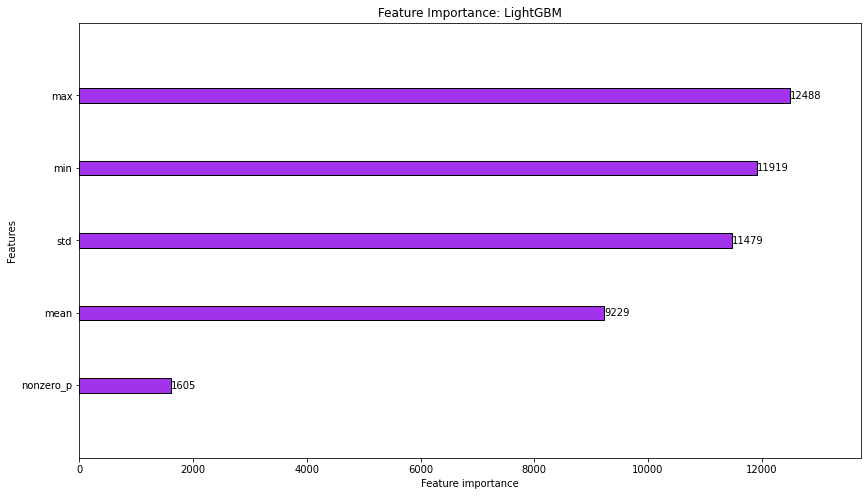

In [ ]:
lightgbm.plot_importance(search_lgbm.best_estimator_, 
                         figsize=(14, 8),
                         title='Feature Importance: LightGBM',
                         grid=False,
                         color='#a134eb', 
                         edgecolor='black');

In [ ]:
with open('drive/MyDrive/UNSW Data Science/Term 3 2022/DATA3001/lightgbm_pipeline.joblib', 'wb') as f:
    joblib.dump(search_lgbm.best_estimator_, f)

In [ ]:
for m in [search_lr.best_estimator_, knn_search.best_estimator_, search_rf.best_estimator_,search_lgbm.best_estimator_]:
          print(evaluate_classifier(m, X_test, y_test))

ROC-AUC (One vs Rest) = 0.8813594214071029
Weighted F1-score = 0.33444925774805145
                                                                   precision    recall  f1-score   support

  FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount       0.57      0.13      0.21        31
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount       0.00      0.00      0.00        31
   FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount       0.78      0.53      0.63       158
 FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount       0.29      0.03      0.05       158
   FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount       0.94      0.70      0.80       233
 FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount       0.31      0.53      0.39       233
   ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount       0.05      0.03      0.04       207
 ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacket

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC-AUC (One vs Rest) = 0.9775663183537353
Weighted F1-score = 0.9080967594142537
                                                                   precision    recall  f1-score   support

  FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount       0.76      0.84      0.80        31
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount       0.55      0.55      0.55        31
   FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount       0.81      0.92      0.86       158
 FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount       0.75      0.76      0.76       158
   FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount       0.97      0.96      0.96       233
 FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount       0.97      0.96      0.96       233
   ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount       0.93      0.97      0.95       207
 ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketC